In [1]:
import numpy as np, pandas as pd 
import random
random.seed(0)
np.random.seed(0)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn import metrics 
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Here we check the datatype of each feature and also look for missing values , here there are zero missing values 

<AxesSubplot:xlabel='Gender', ylabel='count'>

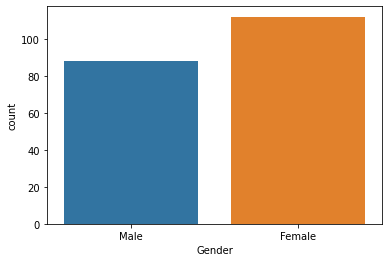

In [4]:
sns.countplot(data= df, x = "Gender")

<AxesSubplot:xlabel='Age', ylabel='Spending Score (1-100)'>

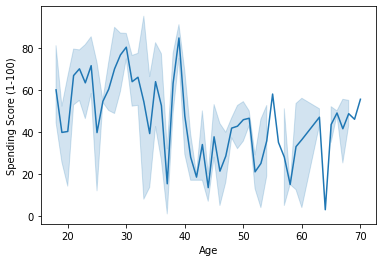

In [5]:
sns.lineplot(data = df, x = "Age",y="Spending Score (1-100)" )

The consumer spending score seems to be at its lowest around 40-50 years of age

<AxesSubplot:xlabel='Age', ylabel='Spending Score (1-100)'>

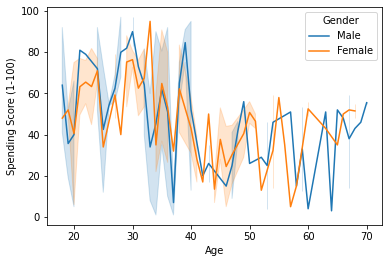

In [6]:
sns.lineplot(data = df,hue = "Gender", x = "Age",y="Spending Score (1-100)" )

Older Females (Over 60 years) tend to have a higher spending score than their male counterparts 

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

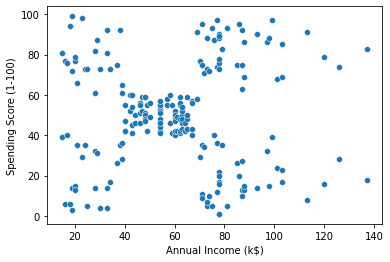

In [7]:
sns.scatterplot(data = df ,x = "Annual Income (k$)", y = "Spending Score (1-100)")

In [15]:
df.Gender.replace({"Male":1,"Female":0},inplace = True) 

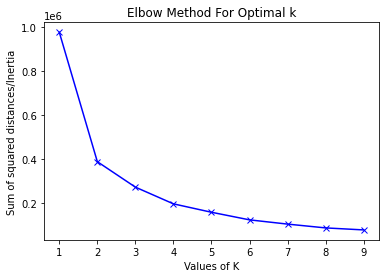

In [17]:
Sum_of_squared_distances = []
K = range(1,10)
for num_clusters in K :
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(df)
 Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()

This is called the **elbow method**

Since we are doing unsupervised learning, we need to find an optimal number of categories(clusters) to group our data into.

so we fit the data multiple times using a centroid based clustering algorithm ( KMeans in this case) and we compute the *sum of squared distances*( or inertia)  for each value of K


The optimal value of K here is **2**

In [20]:
km = KMeans(n_clusters = 2)
y = km.fit_predict(df)

In [22]:
np.bincount(y)

array([ 99, 101])

In [23]:
df["cluster"] = y

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

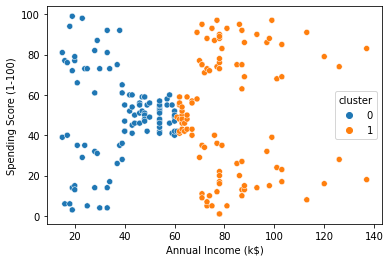

In [24]:
sns.scatterplot(data = df ,hue = "cluster",x = "Annual Income (k$)", y = "Spending Score (1-100)")

## Personal Observation 
**The two clusters show**
- high spending score, low annual income
- low spending score, high annual income


**The Mall In Consideration Most Likely Sells Essential Goods as Low Income Earners actually buy it more often , hence their high spending score.**